У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
df = pd.read_csv('/drive/MyDrive/Colab_Notebooks/Data_Analyst_Course_HP/Module_4/Data_M4/yulu_rental.csv')

1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

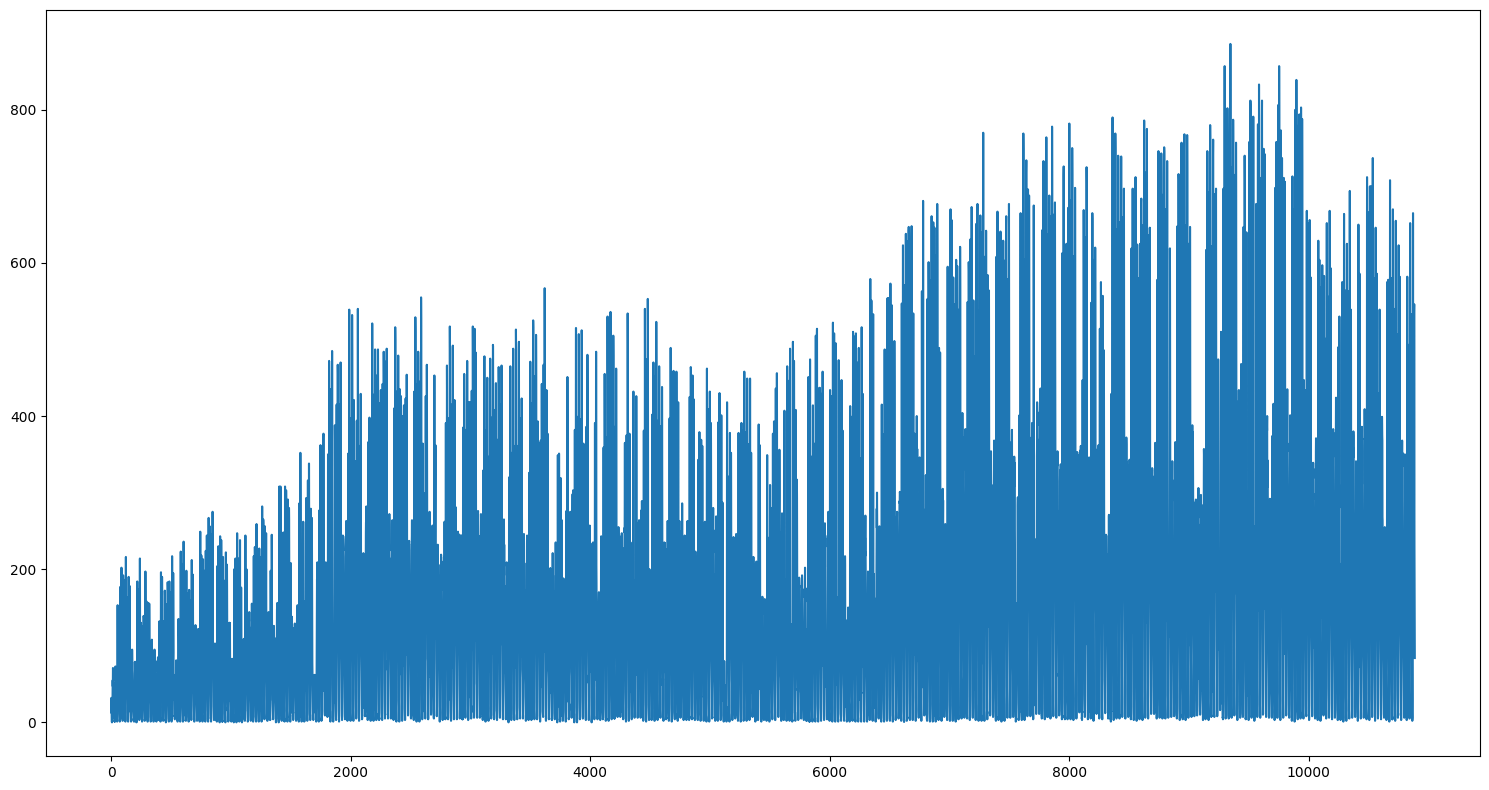

In [5]:
df['registered'].plot(figsize=(15, 8))

plt.tight_layout()


1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

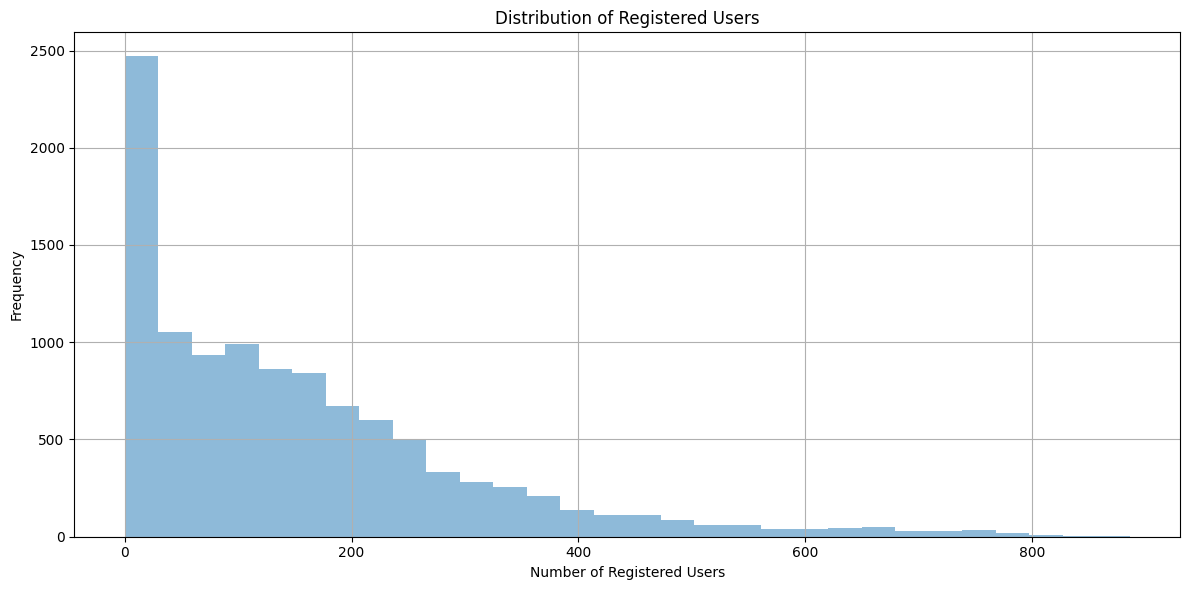

In [6]:
# Іеуз 1. Create histogram of registered users
df['registered'].plot(kind='hist',
                     bins=30,
                     alpha=0.5,
                     figsize=(12, 6))

# Step 2. Add labels and title
plt.xlabel('Number of Registered Users')
plt.ylabel('Frequency')
plt.title('Distribution of Registered Users')
plt.grid(True)

# Adjust layout
plt.tight_layout();


Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [7]:
df['datetime'] = pd.to_datetime(df.datetime)

In [8]:
df.dtypes

,0
datetime,datetime64[ns]
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [9]:
df['dayofweek'] = df.datetime.dt.day_of_week

In [10]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,5


Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [11]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

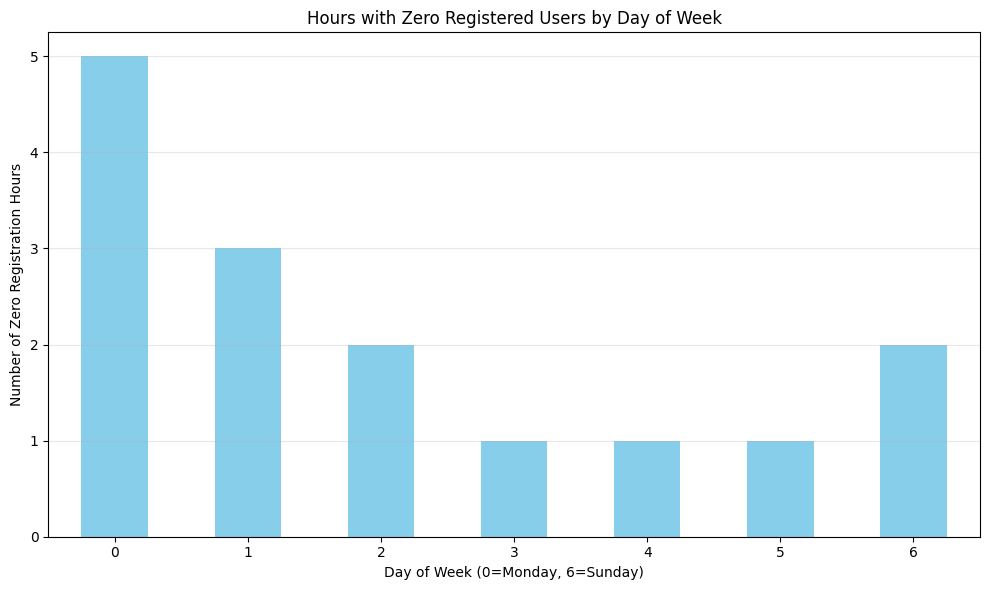

In [12]:
# Step 1. Select records with zero registered users and group by day of week
zero_trips = df[df['registered'] == 0].groupby('dayofweek')['registered'].count()

# Step 2. Create bar plot
zero_trips.plot(kind='bar',
                figsize=(10, 6),
                color='skyblue')

# Add labels and title
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Zero Registration Hours')
plt.title('Hours with Zero Registered Users by Day of Week')

# Rotate x-axis labels
plt.xticks(rotation=0)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Adjust layout
plt.tight_layout();


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.


Total registrations by weather condition:
weather
1    1186163
2     419914
3      87106
4        158
Name: registered, dtype: int64


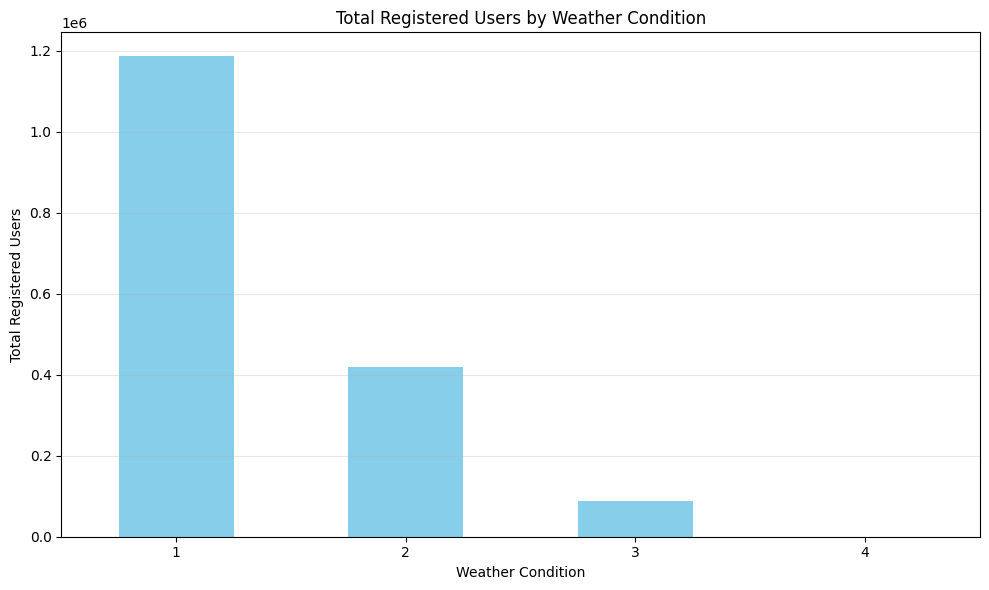

In [13]:
# Step 1. Group by weather and sum registered users
weather_usage = df.groupby('weather')['registered'].sum()

# Step 2. Create bar plot
weather_usage.plot(kind='bar',
                  figsize=(10, 6),
                  color='skyblue')

# Add labels and title
plt.xlabel('Weather Condition')
plt.ylabel('Total Registered Users')
plt.title('Total Registered Users by Weather Condition')

# Rotate x-axis labels
plt.xticks(rotation=0)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Adjust layout
plt.tight_layout()

# Step 3. Print actual numbers
print("\nTotal registrations by weather condition:")
print(weather_usage)


# **Analysis based on weather codes from data description:**

**1 = Clear/Partly cloudy**

**2 = Mist/Cloudy**

**3 = Light Snow/Light Rain**

**4 = Heavy Rain/Ice/Snow**

## **Observations:**

1. Most registrations occur in weather conditions 1 and 2

* Makes sense as people prefer riding in clear/cloudy weather

2. Fewer registrations in condition 3

* Logical as light rain/snow discourages cycling

3. Minimal registrations in condition 4

* Very reasonable as heavy rain/snow makes cycling difficult/dangerous


***This visualization is logically consistent with expected behavior:***

*   Better weather → More riders
*   Worse weather → Fewer riders

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

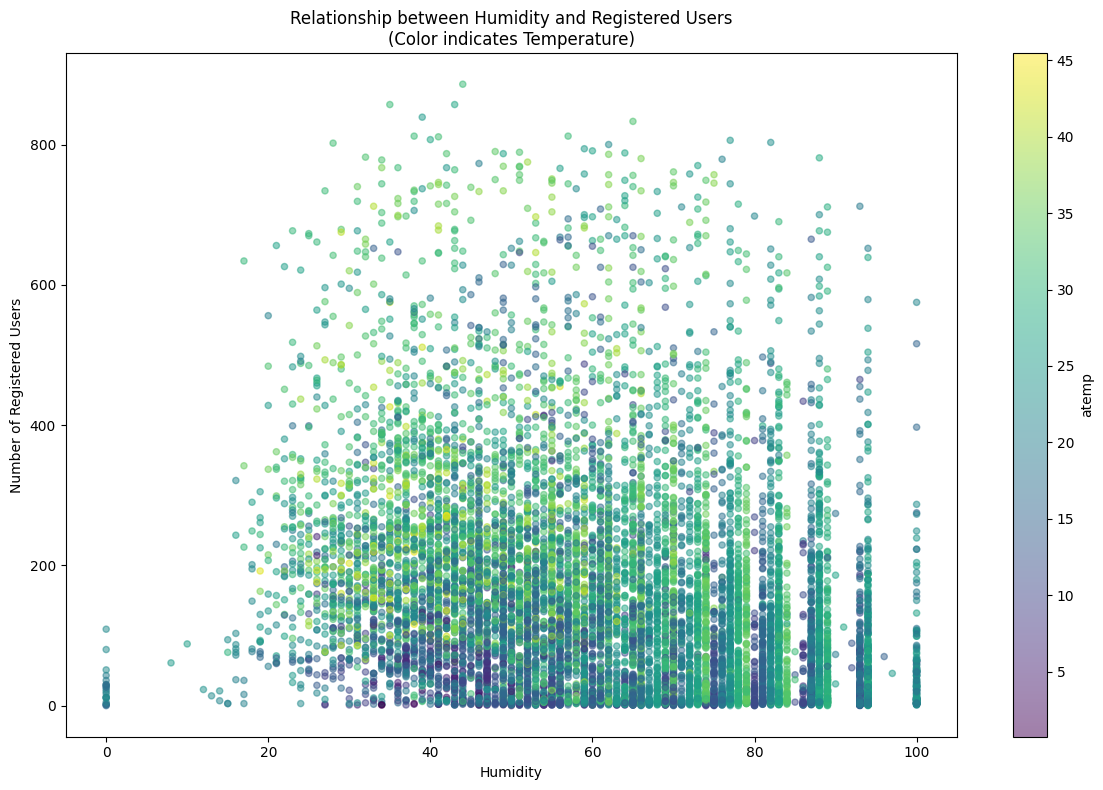

In [15]:
# Step 1. Create scatter plot with color mapping to temperature
df.plot(kind='scatter',
        x='humidity',
        y='registered',
        alpha=0.5,
        c='atemp',  # color based on temperature
        cmap='viridis',  # color scheme
        figsize=(12, 8),
        colorbar=True)  # add color scale

# Step 2. Add labels and title
plt.xlabel('Humidity')
plt.ylabel('Number of Registered Users')
plt.title('Relationship between Humidity and Registered Users\n(Color indicates Temperature)')

plt.tight_layout();


# **Analysis of the scatter plot:**

### **1. Humidity vs. Registrations:**

* Negative correlation: More registrations at lower humidity
* Wide spread of values showing complex relationship
* Maximum registrations occur at moderate humidity levels

### **2. Temperature Effects (color patterns):**

* Darker colors: Lower temperatures
* Brighter colors: Higher temperatures
* Clear pattern showing how temperature influences usage

### **3. Combined Effects:**

* Highest registrations: Moderate humidity + higher temperatures
* Lowest registrations: High humidity + low temperatures
* Some outliers with high registrations despite unfavorable conditions

### **4. Clustering:**

* Dense clusters at certain humidity levels
* Sparse areas indicating less common conditions
* Clear patterns of preferred riding conditions

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)